<a href="https://colab.research.google.com/github/kaiamj/bdrp/blob/main/Random_policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install git+https://github.com/instadeepai/jumanji.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/instadeepai/jumanji.git to /tmp/pip-req-build-w15z57fq
  Running command git clone --filter=blob:none --quiet https://github.com/instadeepai/jumanji.git /tmp/pip-req-build-w15z57fq
  Resolved https://github.com/instadeepai/jumanji.git to commit 10958866909d434ba50edc1915247e4cebc3cb3e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 461.8/461.8 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/

In [8]:
import jax
import jax.numpy as jnp
import jumanji
import numpy as np
import random


In [5]:
from jax import random

key = random.PRNGKey(42)

print(key)

[ 0 42]


In [9]:


def random_(env, num_it): 
  rewards = []
  i = 0
  step_fn = jax.jit(env.step)
  reset_fn = jax.jit(env.reset)
  while i < num_it:

    key = jax.random.PRNGKey(np.random.randint(0, 100))
    reset_key, action_key = jax.random.split(key)

    # Reset environment
    state, timestep = reset_fn(reset_key)
    rew = 0
    while rew == 0:

      # Randomly choose ems_id and item_id using the action mask
      num_ems, num_items = env.action_spec().num_values
      ems_item_id = jax.random.choice(
          key= key,
          a=num_ems * num_items,
          p=timestep.observation.action_mask.flatten(),
      )
      ems_id, item_id = jnp.divmod(ems_item_id, num_items)

      # Wrap the action as a jax array of shape (2,)
      action = jnp.array([ems_id, item_id])
      state,timestep = step_fn(state, action)
      rew = np.array(timestep.reward.flatten())[0]

    rewards.append(rew)
    i += 1 
  return rewards

/usr/local/lib/python3.8/dist-packages/jax/_src/numpy/lax_numpy.py:173: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
/usr/local/lib/python3.8/dist-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "
/usr/local/lib/python3.8/dist-packages/jax/_src/ops/scatter.py:87: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=float32 to dtype=int32. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have i

CPU times: user 28min 41s, sys: 1min 9s, total: 29min 51s
Wall time: 27min 45s


Text(0, 0.5, 'Reward')

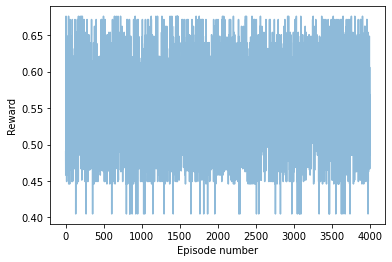

In [13]:
env = jumanji.make("BinPack-toy-v0")
%time rewards = random_(env,4000)
import matplotlib.pyplot as plt
plt.plot(rewards, alpha=0.5)
plt.xlabel('Episode number')
plt.ylabel('Reward')

In [15]:
np.mean(rewards)

0.5576838